# Phân Tích Dữ Liệu Kinh Doanh Pizza

Notebook này thực hiện phân tích dữ liệu bán hàng của một cửa hàng pizza trong năm 2015. Mục tiêu là tìm ra các thông tin chi tiết (insights) về xu hướng bán hàng, các sản phẩm hiệu quả nhất và kém hiệu quả nhất để đưa ra các quyết định kinh doanh.

In [13]:
# === 1. THIẾT LẬP & NHẬP THƯ VIỆN ===
# Ghi chú: Cell này dùng để nhập các thư viện cần thiết cho việc phân tích và trực quan hóa dữ liệu.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

print("Các thư viện đã được nhập thành công!")

Các thư viện đã được nhập thành công!


## 2. Tải và Làm sạch Dữ liệu

Trong phần này, chúng ta sẽ tải file `pizza_sales.csv` vào một DataFrame của Pandas và thực hiện các bước làm sạch cơ bản như chuyển đổi kiểu dữ liệu cho cột ngày tháng.

In [14]:
# === 2. TẢI VÀ CHUYỂN ĐỔI DỮ LIỆU ===

# Đọc dữ liệu từ file CSV
df = pd.read_csv('pizza_sales.csv')

# Chuyển đổi cột 'order_date' sang định dạng datetime.
# format='%d-%m-%Y' khớp với định dạng ngày-tháng-năm trong file CSV.
# errors='coerce' sẽ chuyển các giá trị không hợp lệ thành NaT (Not a Time).
df['order_date'] = pd.to_datetime(df['order_date'], format='%d-%m-%Y', errors='coerce')

# Hiển thị 2 dòng đầu tiên để kiểm tra dữ liệu đã được tải đúng chưa
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


## 3. Phân tích Tổng quan (Exploratory Data Analysis - EDA)

Phần này tập trung vào việc tính toán các chỉ số hiệu suất chính (KPIs) và trực quan hóa các xu hướng tổng thể theo thời gian, loại pizza và kích cỡ.

In [15]:
# === A. CÁC CHỈ SỐ HIỆU SUẤT CHÍNH (KPIs) ===
# Ghi chú: Tính toán các chỉ số quan trọng để có cái nhìn tổng quan về hiệu quả kinh doanh.

print('A. Các chỉ số hiệu suất chính (KPIs)\n')

# 1. Tổng doanh thu: Tổng giá trị của tất cả các đơn hàng.
total_revenue = df['total_price'].sum()
print(f"Tổng Doanh thu: ${total_revenue:,.2f}")

# 2. Tổng số đơn hàng: Đếm số lượng order_id duy nhất.
total_orders = df['order_id'].nunique()
print(f"Tổng số Đơn hàng: {total_orders:,}")

# 3. Tổng số pizza đã bán: Tổng số lượng pizza trong tất cả các đơn hàng.
total_pizzas_sold = df['quantity'].sum()
print(f"Tổng số Pizza đã bán: {total_pizzas_sold:,}")

# 4. Giá trị đơn hàng trung bình: Tổng doanh thu / Tổng số đơn hàng.
avg_order_value = total_revenue / total_orders
print(f"Giá trị Đơn hàng Trung bình: ${avg_order_value:,.2f}")

# 5. Số pizza trung bình mỗi đơn hàng: Tổng số pizza / Tổng số đơn hàng.
avg_pizzas_per_order = total_pizzas_sold / total_orders
print(f"Số Pizza Trung bình mỗi Đơn hàng: {avg_pizzas_per_order:.2f}")

A. Các chỉ số hiệu suất chính (KPIs)

Tổng Doanh thu: $817,860.05
Tổng số Đơn hàng: 21,350
Tổng số Pizza đã bán: 49,574
Giá trị Đơn hàng Trung bình: $38.31
Số Pizza Trung bình mỗi Đơn hàng: 2.32


### B. Xu hướng Đặt hàng theo Ngày trong Tuần

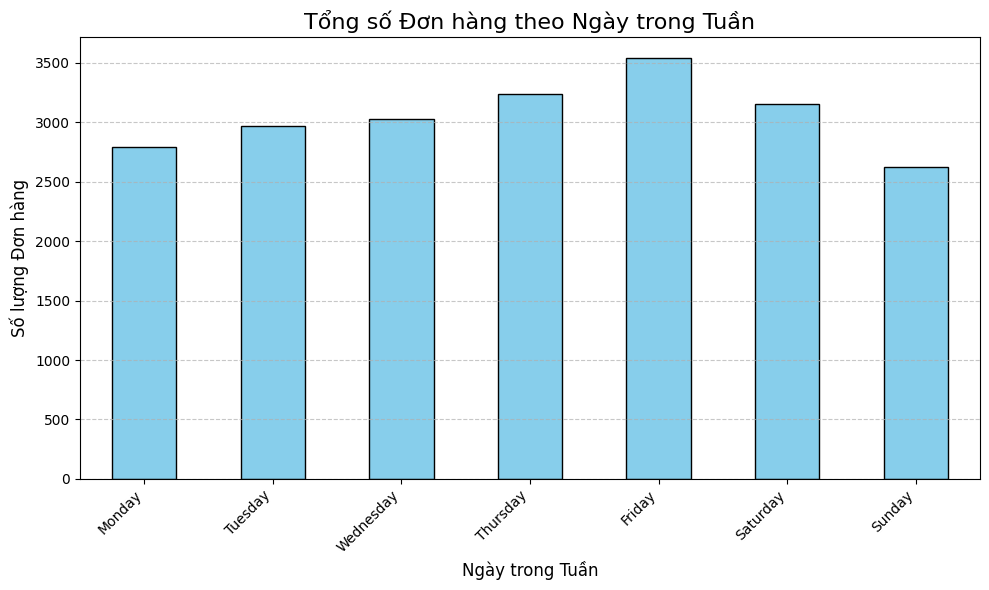

In [16]:
# === B. BIỂU ĐỒ XU HƯỚNG ĐẶT HÀNG THEO NGÀY TRONG TUẦN ===

# Trích xuất tên của ngày trong tuần từ cột 'order_date'
df['day_of_week'] = df['order_date'].dt.day_name()

# Nhóm dữ liệu theo ngày và đếm số đơn hàng duy nhất
# Sắp xếp lại index để các ngày hiển thị theo đúng thứ tự trong tuần
daily_orders = df.groupby('day_of_week')['order_id'].nunique().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='bar', color='skyblue', edgecolor='black')

# Thiết lập tiêu đề và nhãn
plt.title('Tổng số Đơn hàng theo Ngày trong Tuần', fontsize=16)
plt.xlabel('Ngày trong Tuần', fontsize=12)
plt.ylabel('Số lượng Đơn hàng', fontsize=12)
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc hơn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Tự động điều chỉnh bố cục

# Hiển thị biểu đồ
plt.show()

### C. Xu hướng Đặt hàng theo Tháng

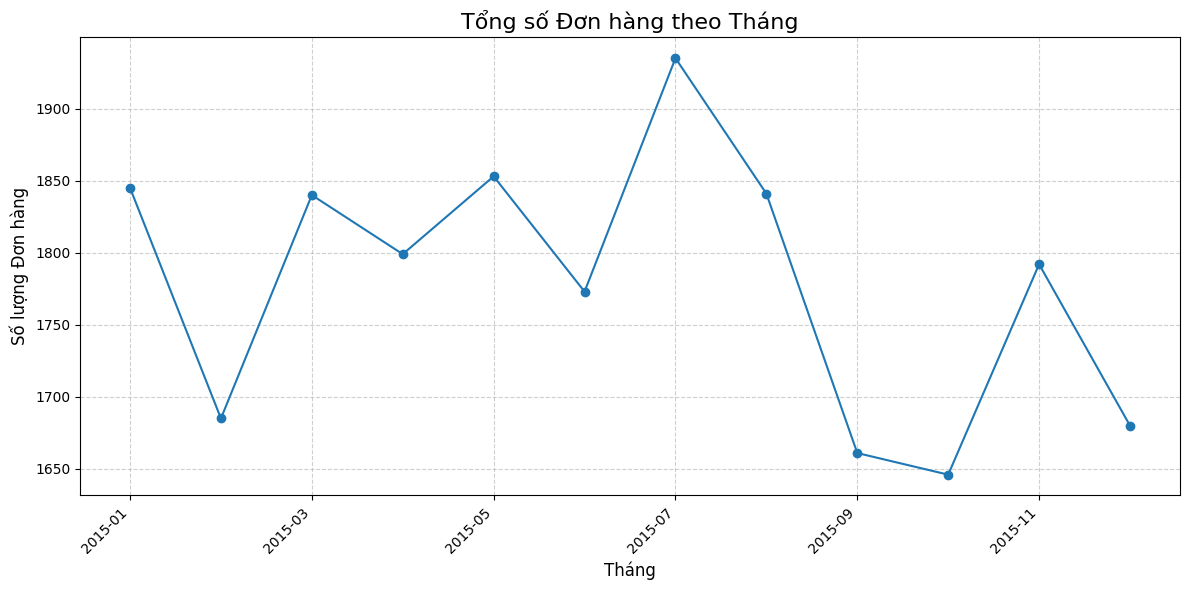

In [17]:
# === C. BIỂU ĐỒ XU HƯỚNG ĐẶT HÀNG THEO THÁNG ===

# Tạo cột 'order_month' bằng cách lấy thông tin năm và tháng
df['order_month'] = df['order_date'].dt.to_period('M')

# Nhóm dữ liệu theo tháng và đếm số đơn hàng duy nhất
monthly_orders = df.groupby('order_month')['order_id'].nunique()

# Chuyển đổi index từ Period sang chuỗi string 'YYYY-MM' để hiển thị đẹp hơn
monthly_orders.index = monthly_orders.index.strftime('%Y-%m')

# Vẽ biểu đồ đường
plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o', linestyle='-')

# Thiết lập tiêu đề và nhãn
plt.title('Tổng số Đơn hàng theo Tháng', fontsize=16)
plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Số lượng Đơn hàng', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

### D. Tỷ lệ Doanh thu và Số lượng bán theo Phân loại Pizza

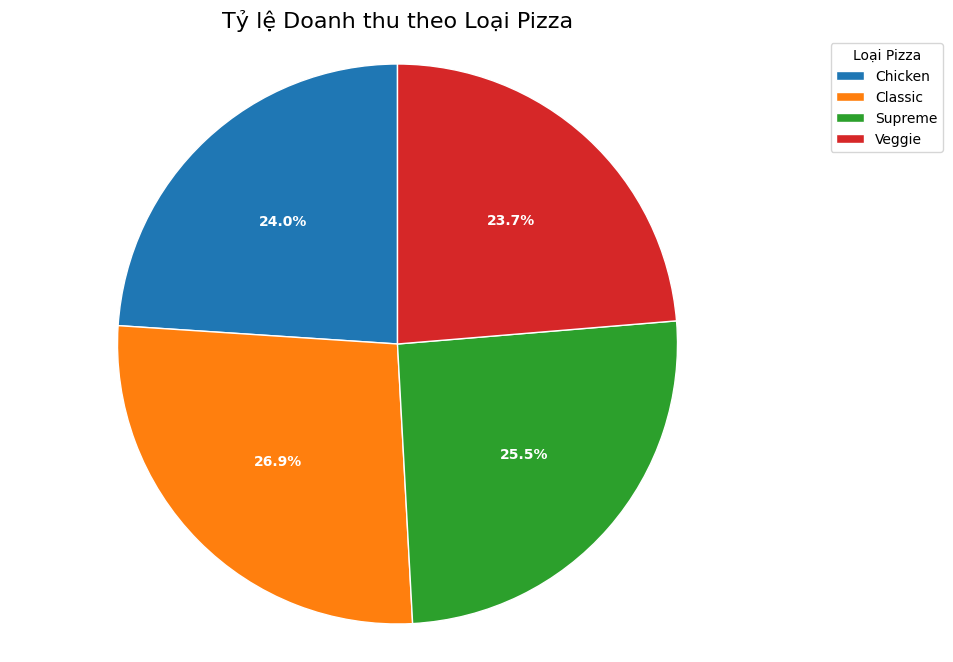

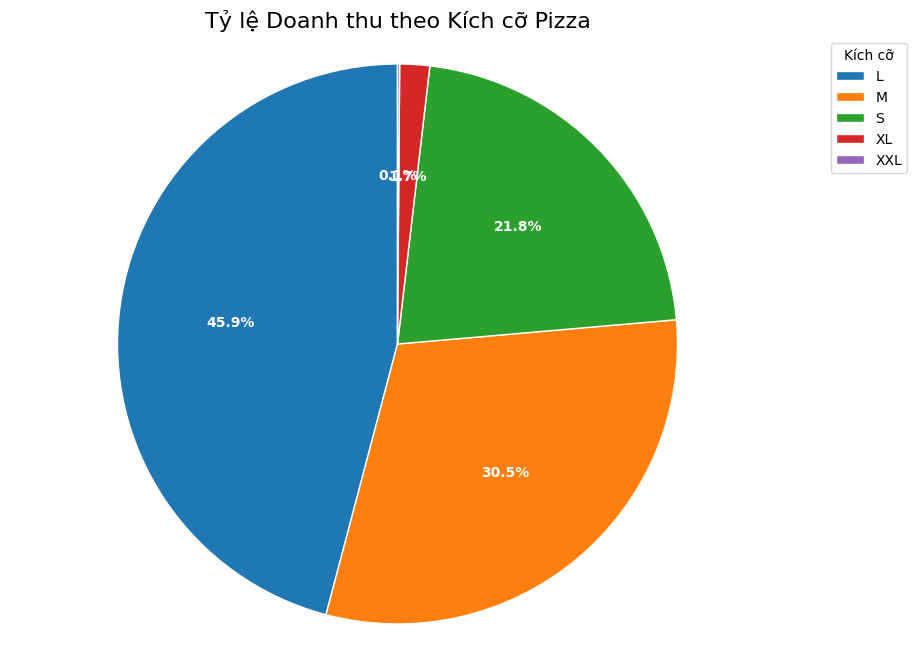

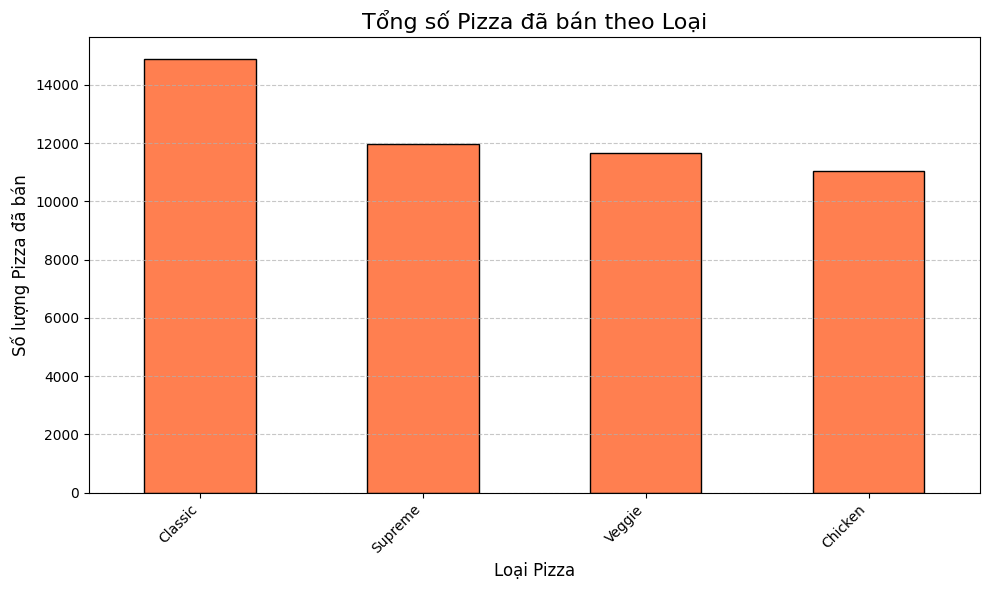

In [18]:
# === D. TỶ LỆ DOANH THU VÀ SỐ LƯỢNG BÁN THEO PHÂN LOẠI PIZZA ===

# 1. Tỷ lệ Doanh thu theo Loại Pizza
category_revenue = df.groupby('pizza_category')['total_price'].sum()

plt.figure(figsize=(10, 8))
category_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                      wedgeprops={'edgecolor': 'white'}, textprops={'color':"w", 'weight':'bold'})
plt.title('Tỷ lệ Doanh thu theo Loại Pizza', fontsize=16)
plt.ylabel('')  # Bỏ nhãn trục y
plt.axis('equal')
plt.legend(title='Loại Pizza', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 2. Tỷ lệ Doanh thu theo Kích cỡ Pizza
size_revenue = df.groupby('pizza_size')['total_price'].sum()

plt.figure(figsize=(10, 8))
size_revenue.plot(kind='pie', autopct='%1.1f%%', startangle=90,
                  wedgeprops={'edgecolor': 'white'}, textprops={'color':"w", 'weight':'bold'})
plt.title('Tỷ lệ Doanh thu theo Kích cỡ Pizza', fontsize=16)
plt.ylabel('')
plt.axis('equal')
plt.legend(title='Kích cỡ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# 3. Tổng số Pizza đã bán theo Loại
category_quantity = df.groupby('pizza_category')['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
category_quantity.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Tổng số Pizza đã bán theo Loại', fontsize=16)
plt.xlabel('Loại Pizza', fontsize=12)
plt.ylabel('Số lượng Pizza đã bán', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4. Hàm Trợ Giúp (Helper Function)

Để tránh lặp lại code khi vẽ các biểu đồ top/bottom 5, chúng ta tạo một hàm có thể tái sử dụng.

In [19]:
# === HÀM TRỢ GIÚP VẼ BIỂU ĐỒ NGANG ===
# Ghi chú: Hàm này giúp chuẩn hóa việc vẽ biểu đồ top/bottom 5, làm cho code gọn gàng hơn.

def plot_horizontal_bar(data, title, xlabel, color='c'):
    """
    Vẽ biểu đồ cột ngang và thêm nhãn số liệu.

    Args:
        data (pd.Series): Dữ liệu cần vẽ (đã được tính toán).
        title (str): Tiêu đề của biểu đồ.
        xlabel (str): Nhãn cho trục x.
        color (str, optional): Màu của các thanh. Mặc định là 'c' (cyan).
    """
    plt.figure(figsize=(12, 8))
    
    # Sắp xếp dữ liệu để thanh dài nhất ở trên cùng
    data_sorted = data.sort_values(ascending=True)
    
    # Vẽ biểu đồ
    bars = data_sorted.plot(kind='barh', color=color, edgecolor='black', width=0.8)
    
    # Thiết lập tiêu đề và nhãn
    plt.title(title, fontsize=16, pad=20)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Tên Pizza', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    
    # Bỏ khung (spines) cho đẹp hơn
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Thêm nhãn số liệu vào cuối mỗi thanh để dễ đọc
    for bar in bars.patches:
        plt.text(bar.get_width() + bar.get_width()*0.01,  # Vị trí của text
                 bar.get_y() + bar.get_height()/2,
                 f'{bar.get_width():,.0f}', # Format số liệu
                 va='center', ha='left', fontsize=11)
    
    plt.tight_layout()
    plt.show()

## 5. Phân tích Chi tiết: Các Pizza Tốt nhất và Kém nhất

Sử dụng hàm trợ giúp đã tạo, chúng ta sẽ xác định top 5 và bottom 5 pizza dựa trên các tiêu chí: Doanh thu, Số lượng bán và Số đơn hàng.

Top 5 Pizza theo Doanh thu:
pizza_name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: total_price, dtype: float64


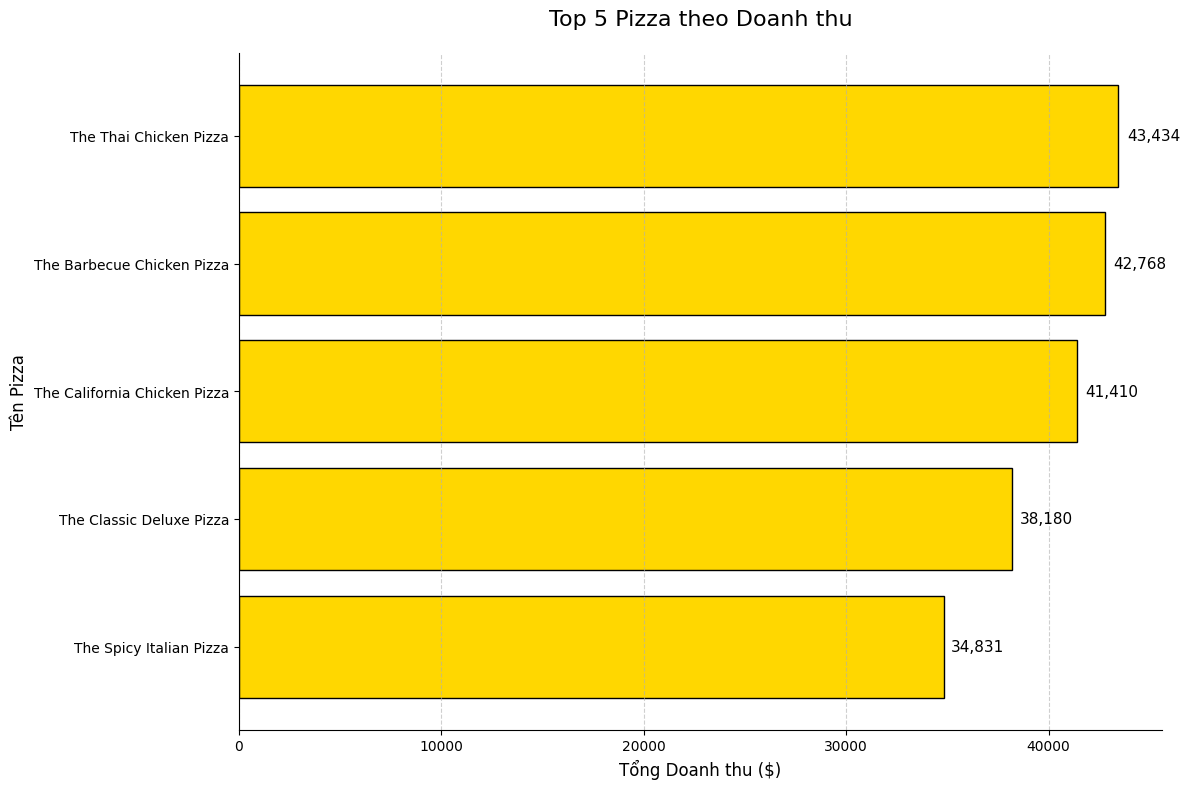


Bottom 5 Pizza theo Doanh thu:
pizza_name
The Brie Carre Pizza         11588.50
The Green Garden Pizza       13955.75
The Spinach Supreme Pizza    15277.75
The Mediterranean Pizza      15360.50
The Spinach Pesto Pizza      15596.00
Name: total_price, dtype: float64


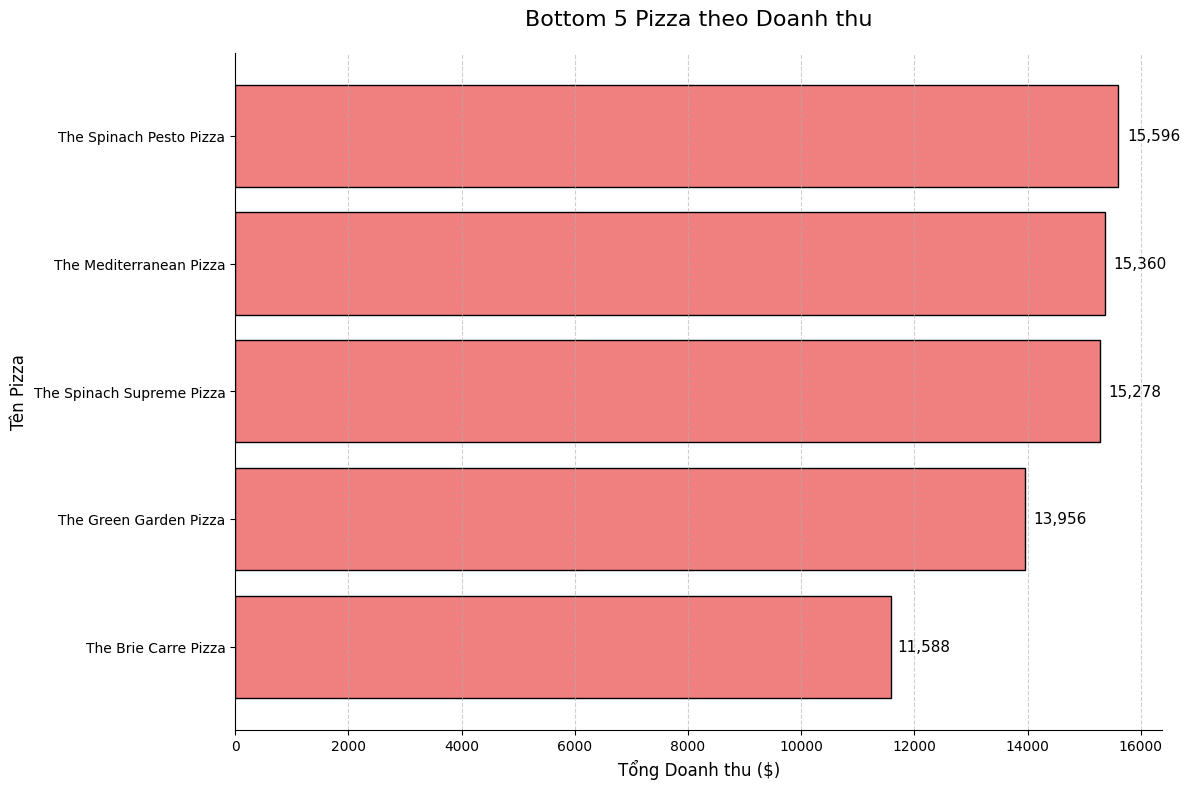

In [20]:
# === TOP 5 & BOTTOM 5 PIZZA THEO DOANH THU ===

# 1. Top 5 Pizza theo Doanh thu
top5_revenue = df.groupby('pizza_name')['total_price'].sum().nlargest(5)
print("Top 5 Pizza theo Doanh thu:")
print(top5_revenue)
plot_horizontal_bar(top5_revenue, 'Top 5 Pizza theo Doanh thu', 'Tổng Doanh thu ($)', color='gold')

# 2. Bottom 5 Pizza theo Doanh thu
bottom5_revenue = df.groupby('pizza_name')['total_price'].sum().nsmallest(5)
print("\nBottom 5 Pizza theo Doanh thu:")
print(bottom5_revenue)
plot_horizontal_bar(bottom5_revenue, 'Bottom 5 Pizza theo Doanh thu', 'Tổng Doanh thu ($)', color='lightcoral')

Top 5 Pizza theo Số lượng bán:
pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: quantity, dtype: int64


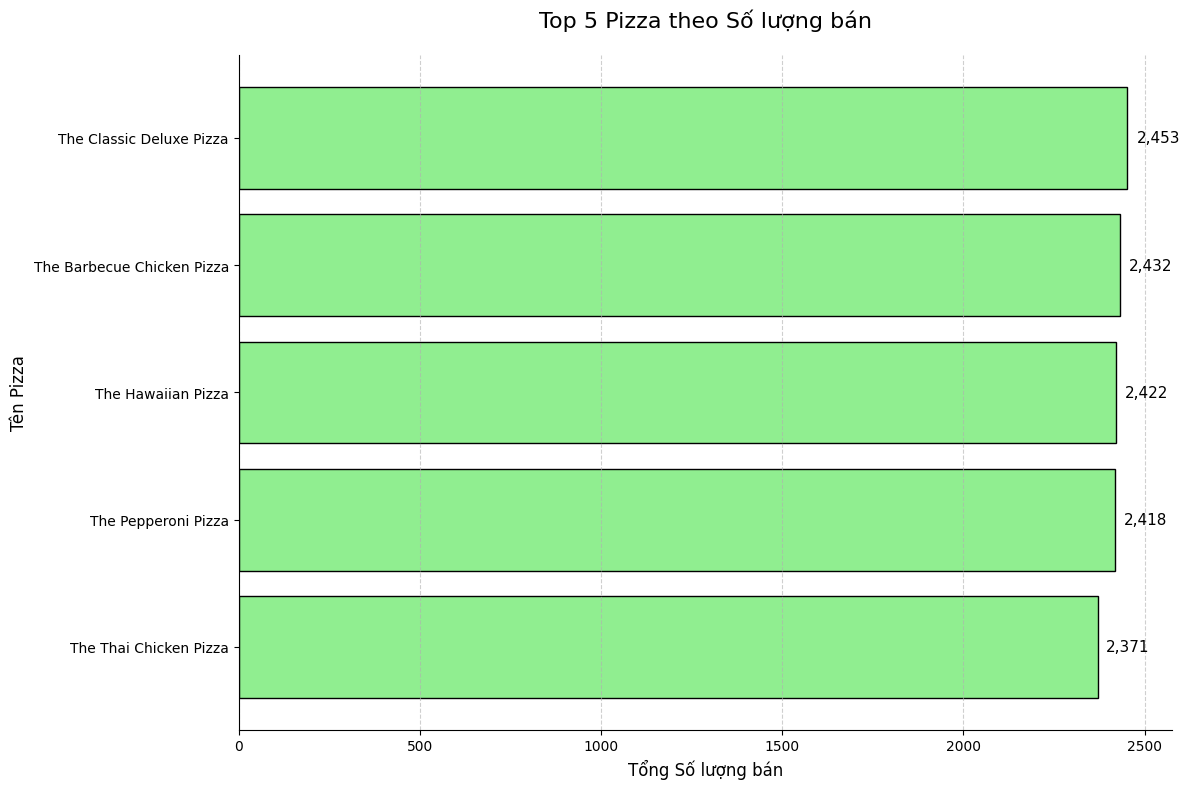


Bottom 5 Pizza theo Số lượng bán:
pizza_name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: quantity, dtype: int64


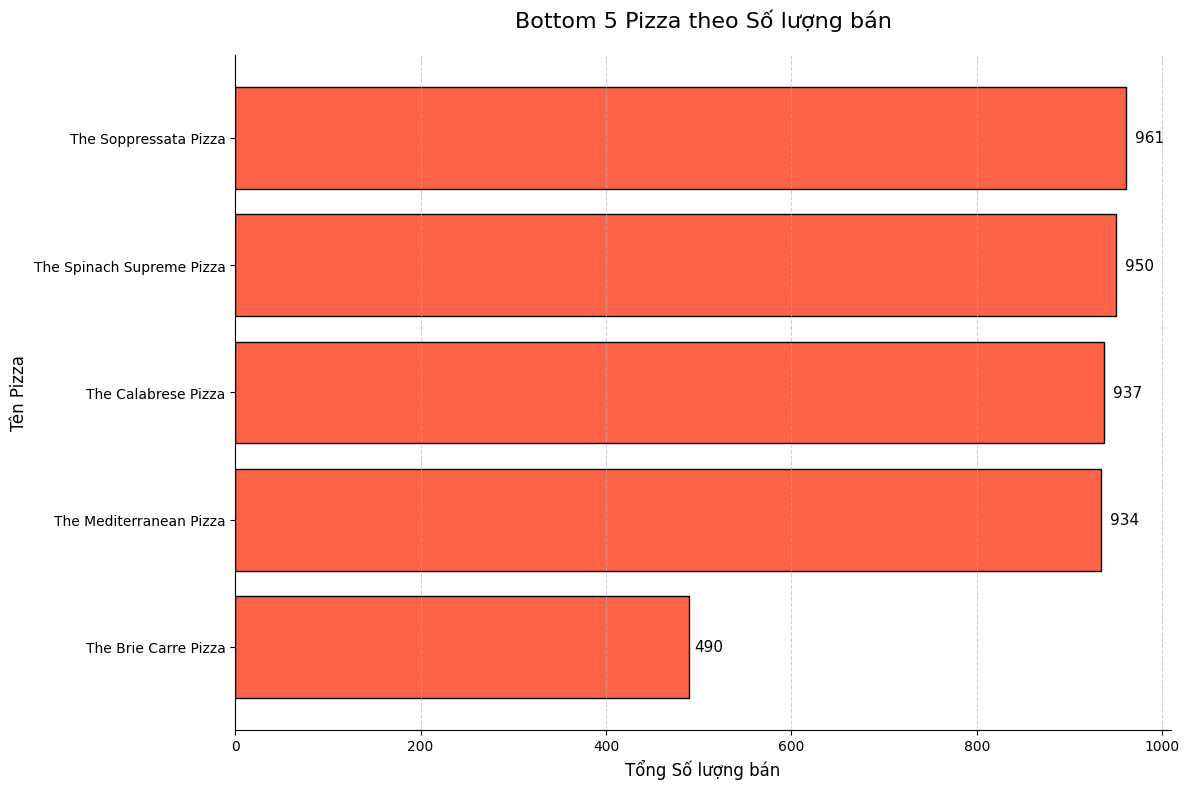

In [21]:
# === TOP 5 & BOTTOM 5 PIZZA THEO SỐ LƯỢNG BÁN ===

# 1. Top 5 Pizza theo Số lượng bán
top5_quantity = df.groupby('pizza_name')['quantity'].sum().nlargest(5)
print("Top 5 Pizza theo Số lượng bán:")
print(top5_quantity)
plot_horizontal_bar(top5_quantity, 'Top 5 Pizza theo Số lượng bán', 'Tổng Số lượng bán', color='lightgreen')

# 2. Bottom 5 Pizza theo Số lượng bán
bottom5_quantity = df.groupby('pizza_name')['quantity'].sum().nsmallest(5)
print("\nBottom 5 Pizza theo Số lượng bán:")
print(bottom5_quantity)
plot_horizontal_bar(bottom5_quantity, 'Bottom 5 Pizza theo Số lượng bán', 'Tổng Số lượng bán', color='tomato')

Top 5 Pizza theo Tổng số Đơn hàng:
pizza_name
The Classic Deluxe Pizza      2329
The Hawaiian Pizza            2280
The Pepperoni Pizza           2278
The Barbecue Chicken Pizza    2273
The Thai Chicken Pizza        2225
Name: order_id, dtype: int64


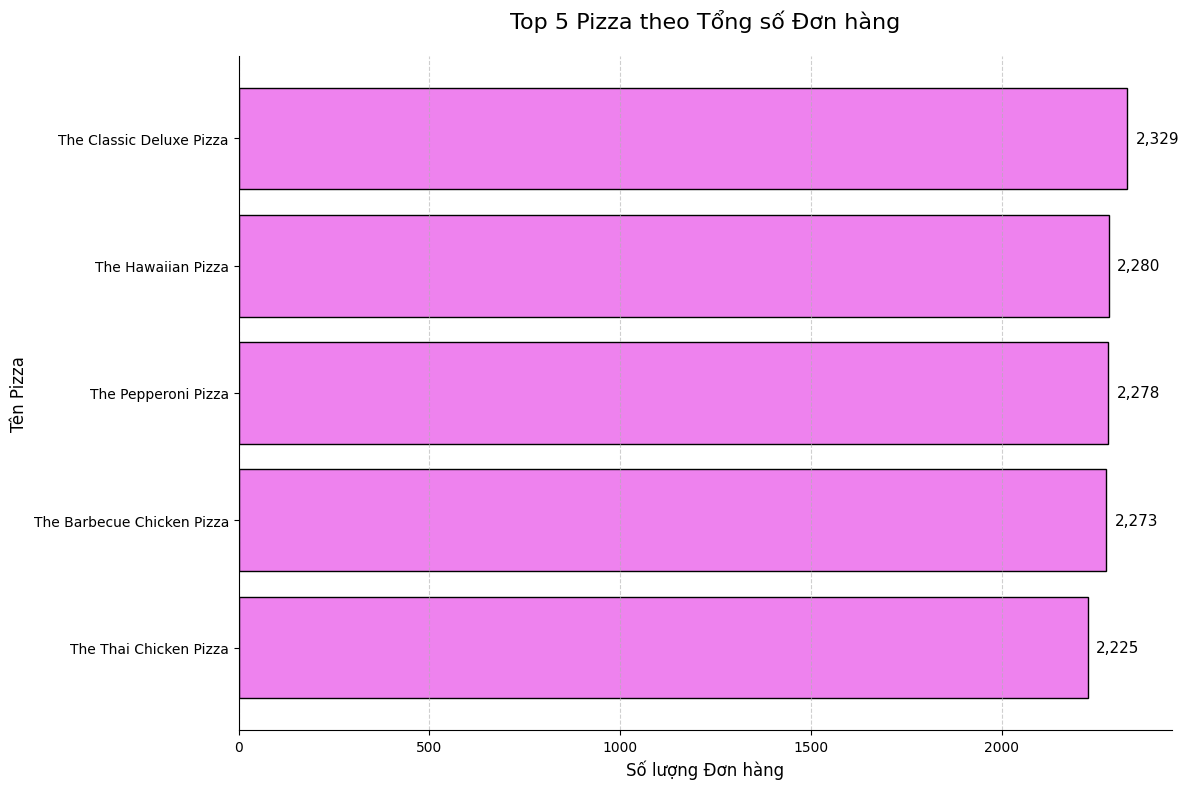


Bottom 5 Pizza theo Tổng số Đơn hàng:
pizza_name
The Brie Carre Pizza         480
The Mediterranean Pizza      912
The Calabrese Pizza          918
The Spinach Supreme Pizza    918
The Chicken Pesto Pizza      938
Name: order_id, dtype: int64


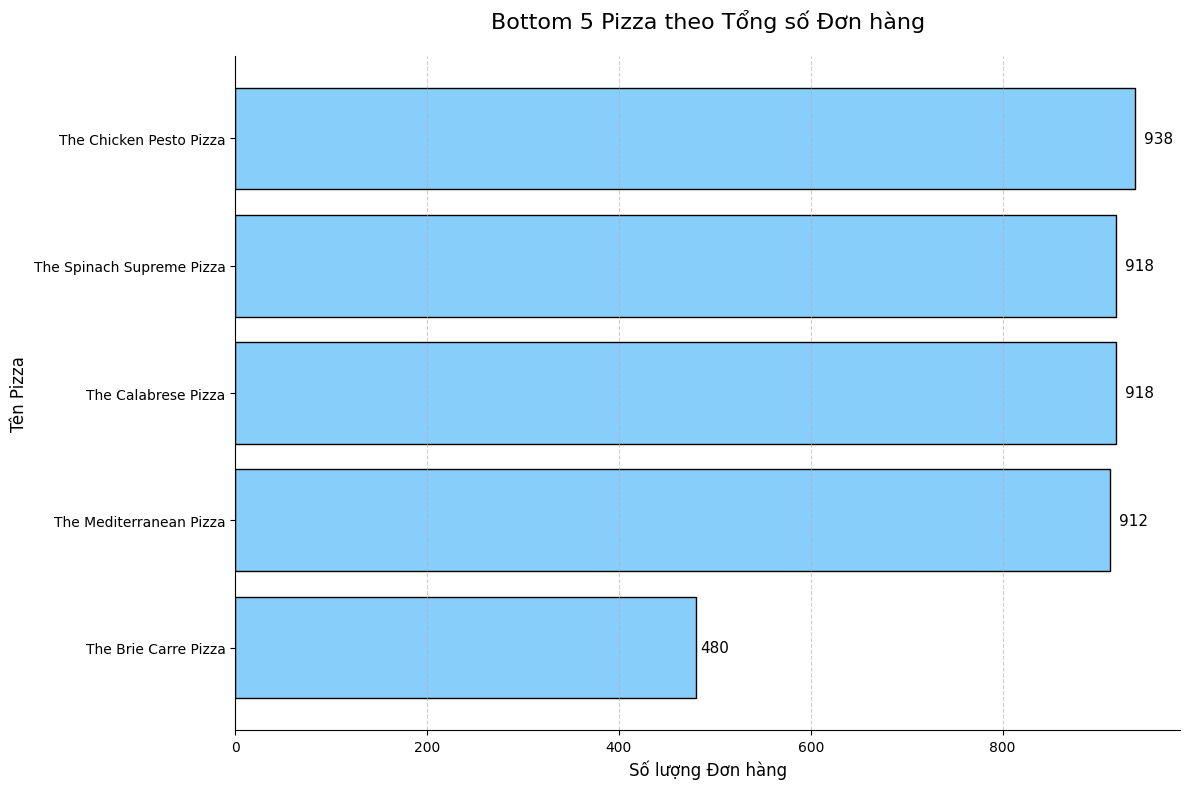

In [22]:
# === TOP 5 & BOTTOM 5 PIZZA THEO TỔNG SỐ ĐƠN HÀNG ===

# 1. Top 5 Pizza theo Tổng số Đơn hàng
top5_orders = df.groupby('pizza_name')['order_id'].nunique().nlargest(5)
print("Top 5 Pizza theo Tổng số Đơn hàng:")
print(top5_orders)
plot_horizontal_bar(top5_orders, 'Top 5 Pizza theo Tổng số Đơn hàng', 'Số lượng Đơn hàng', color='violet')

# 2. Bottom 5 Pizza theo Tổng số Đơn hàng
bottom5_orders = df.groupby('pizza_name')['order_id'].nunique().nsmallest(5)
print("\nBottom 5 Pizza theo Tổng số Đơn hàng:")
print(bottom5_orders)
plot_horizontal_bar(bottom5_orders, 'Bottom 5 Pizza theo Tổng số Đơn hàng', 'Số lượng Đơn hàng', color='lightskyblue')